# Example -2  Introduction to t-SNE for Clustering Visualization

This notebook demonstrates how to use **t-Distributed Stochastic Neighbor Embedding (t-SNE)** to perform dimensionality reduction and visualize clustering relationships among organisms based on their phenotypic growth predictions. The process involves reducing high-dimensional data into a 2D space to identify clusters and relationships visually.

## Step 1: Load Necessary Libraries
We import essential Python libraries:
- **pandas**: For data manipulation and loading tabular data.
- **matplotlib**: For plotting the clustering results.
- **sklearn.manifold.TSNE**: For dimensionality reduction using t-SNE.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Step 2: Load the Data
We load two phenotype prediction datasets:
- ENIGMA dataset  (couresty of ENIGMA group, and Hira Lesea)
- PMI dataset     (courtesy of PMI group, and Ranjan Priya)

The first column of each dataset is set as the index (organism names).

In [2]:
# Load the data
enigma_data = pd.read_csv('ENIGMA_phenoPredictions_CompleteM.tsv', sep='\t', index_col=0)
pmi_data = pd.read_csv('PMI_phenoPredictions_CompleteM.tsv', sep='\t', index_col=0)

## Step 3: Label and Combine the Datasets
Each dataset is labeled to indicate its source (ENIGMA or PMI), and then the two datasets are combined into a single DataFrame to facilitate unified analysis.

In [3]:
# Label the datasets
enigma_data['Dataset'] = 'ENIGMA'
pmi_data['Dataset'] = 'PMI'

In [4]:
# Combine the datasets
combined_data = pd.concat([enigma_data, pmi_data])

## Step 4: Prepare Data for t-SNE
We separate the dataset labels (used for coloring in the visualization) and the binary growth prediction data. The latter is used as the feature matrix for dimensionality reduction.

In [5]:
# Separate the 'Dataset' column for coloring and drop it from the feature matrix
labels = combined_data['Dataset']
feature_matrix = combined_data.drop(columns=['Dataset'])

## Step 5: Perform t-SNE Dimensionality Reduction
We use t-SNE to reduce the high-dimensional feature matrix to 2D. This reduction:
- Helps identify clusters of similar organisms.
- Preserves local and global structure in the data.
- Creates a visually interpretable 2D representation.

In [6]:
# Perform t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(feature_matrix)

/Users/mgrover/mambaforge/envs/neiu-data-science-workshop-2025-dev/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


## Step 6: Visualize the t-SNE Results
We plot the t-SNE results as a scatter plot. Points (organisms) are color-coded based on their dataset of origin (ENIGMA or PMI), making it easier to distinguish between groups and identify clusters.

In [7]:
# Convert results to a DataFrame for easy plotting
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Dataset'] = labels.values

## Visualize the t-SNE Clusters

- **Scatter Plot**: Organisms are visualized as points in the 2D t-SNE space.
- **Color Coding**: Points are colored by dataset type:
  - Blue for ENIGMA.
  - Green for PMI.
- **Labels**:
  - **t-SNE 1** and **t-SNE 2** represent the reduced dimensions.
  - The legend distinguishes between the datasets.

---

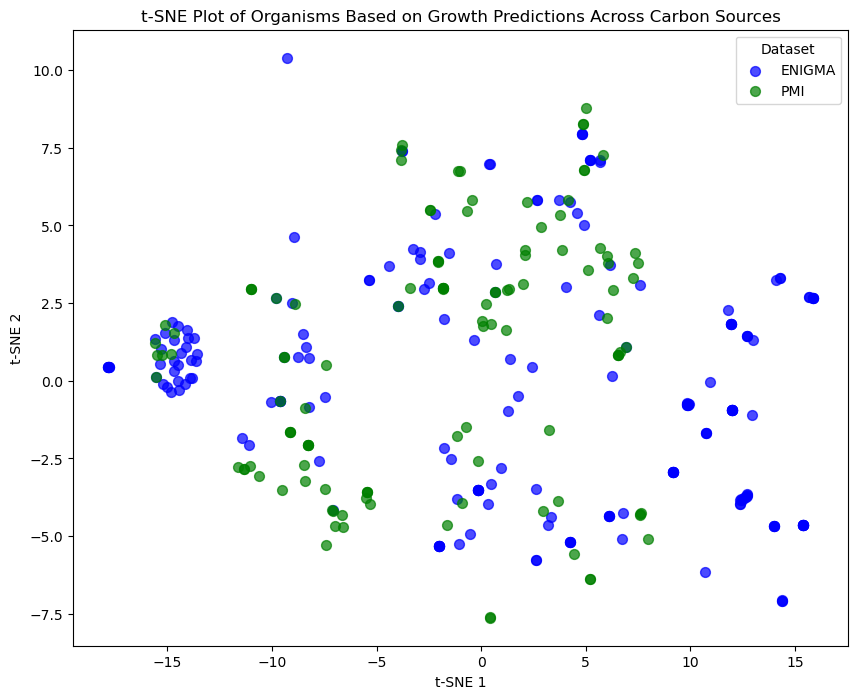

In [8]:
# Plotting the t-SNE results with color coding for each dataset
plt.figure(figsize=(10, 8))
colors = {'ENIGMA': 'blue', 'PMI': 'green'}

for dataset in colors:
    subset = tsne_df[tsne_df['Dataset'] == dataset]
    plt.scatter(subset['t-SNE 1'], subset['t-SNE 2'], s=50, alpha=0.7, label=dataset, color=colors[dataset])

plt.title("t-SNE Plot of Organisms Based on Growth Predictions Across Carbon Sources")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Dataset')
plt.show()

## About t-SNE Plot

- **Purpose**: The t-SNE plot provides an intuitive way to visualize high-dimensional relationships. 
  - Organisms with similar growth patterns (e.g., similar ability to utilize carbon sources) cluster together in the 2D space.
  
- **Interpretation**:
  - **Clusters**: Indicate groups of organisms with similar phenotypic profiles.
  - **Outliers**: Represent unique organisms with distinct growth patterns.

- **Applications**: This technique is widely used in biology for:
  - Clustering phenotypic or genetic data.
  - Exploratory data analysis in other fields.